## Лабораторна робота №2 Товстенка Артема групи ФБ-31мп

__Завантажив датасет з минулої лабораторної__ 

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Завантаження даних
data = pd.read_csv("train.csv")

# __1. Візуалізація та зниження розмірності__

In [2]:
def visualize_data(data, method):
    reduced_data = method(n_components=2).fit_transform(data)
    plt.figure(figsize=(6, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
    plt.title(f'Візуалізація даних з використанням {method.__name__}')
    plt.show()

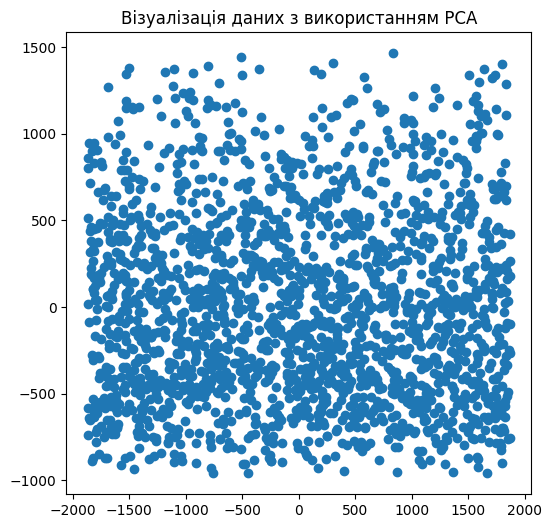

In [3]:
# Використання PCA для візуалізації даних
visualize_data(data, PCA)

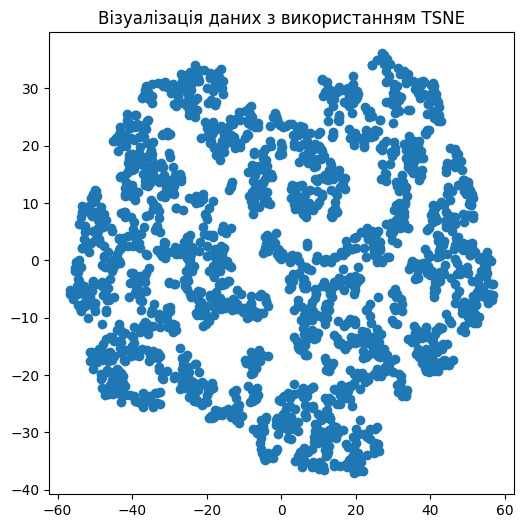

In [4]:
# Використання t-SNE для візуалізації даних
visualize_data(data, TSNE)

# __2. Кластерний аналіз__

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from PIL import Image

image = Image.open('les.jpg')
image = np.array(image, dtype=np.float64) / 255

**Функція для візуалізації результату**

In [35]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

**Квантування зображення для різних глибин**

Квантування зображення з 64 рівнями


C:\Users\gesta\pythonlabs\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


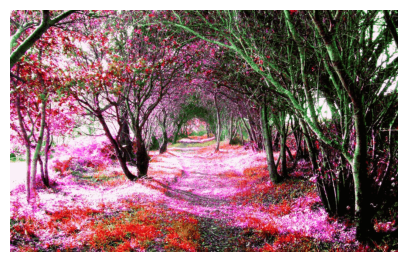

Квантування зображення з 32 рівнями


C:\Users\gesta\pythonlabs\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


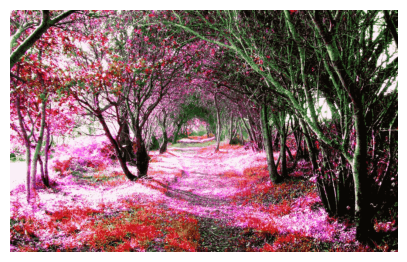

C:\Users\gesta\pythonlabs\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Квантування зображення з 16 рівнями


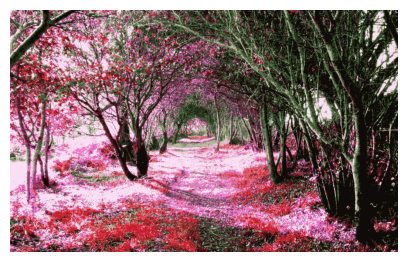

Квантування зображення з 8 рівнями


C:\Users\gesta\pythonlabs\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


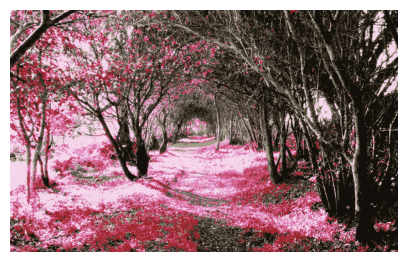

In [36]:
for n_colors in [64, 32, 16, 8]:
    print(f"Квантування зображення з {n_colors} рівнями")
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors).fit(image_array_sample)
    labels = kmeans.predict(image_array)
    
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    plt.show()

# __3. Обробка та класифікація текстових даних__

In [38]:
import pandas as pd

data = pd.read_csv("spam.csv")
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


**Перевірка класу**

In [39]:
print(data['v1'].value_counts())

v1
ham     4825
spam     747
Name: count, dtype: int64


**Модуль nltk, видалення стоп-слів, пунктуації, перетворенні на нижній регістр**

In [40]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Завантаження стоп-слів
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Завантаження даних
data = pd.read_csv("spam.csv")

# Функція для передобробки тексту
def preprocess_text(text):
    text = text.lower()  # Перетворення на lowercase
    text = ' '.join(word for word in word_tokenize(text) if word.isalnum())  # Видалення пунктуації та токенізація
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Видалення стоп-слів
    return text

# Застосування передобробки до всіх текстів та створення нових стовпців
data['original_text'] = data['v2']
data['filtered_text'] = data['v2'].apply(preprocess_text)


# Виведення нефільтрованого та фільтрованого тексту
print("Original Text:")
print(data['original_text'].head())

print("Filtered Text:")
print(data['filtered_text'].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gesta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gesta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original Text:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: original_text, dtype: object
Filtered Text:
0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4               nah think goes usf lives around though
Name: filtered_text, dtype: object


**Створення найбільш поширених слів за допомогою wordcloud**

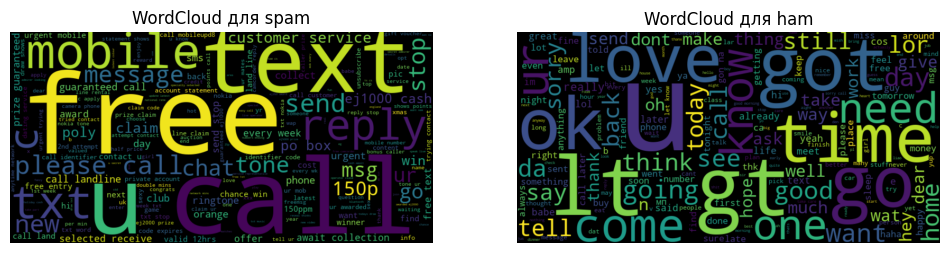

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_words = ' '.join(data[data['v1'] == 'spam']['filtered_text'])
spam_wordcloud = WordCloud(width=800, height=400).generate(spam_words)

ham_words = ' '.join(data[data['v1'] == 'ham']['filtered_text'])
ham_wordcloud = WordCloud(width=800, height=400).generate(ham_words)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('WordCloud для spam')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('WordCloud для ham')
plt.axis("off")
plt.show()


**Вибір кількості ознак для оцінки якості**

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['filtered_text'])
y = data['v1']


**Оцінка якості, Confusion Matrix**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9739910313901345
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
[[965   0]
 [ 29 121]]
